In [30]:
from pydub import AudioSegment
from pydub.playback import play
ref_file_name = "./db/Radwa1.wav"
play(AudioSegment.from_wav(ref_file_name))

In [31]:
################# TO RECORD AUDIO FOR 2 SECs INTO output.wav FILE #########################
import pyaudio
import wave
chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 2
fs = 44100  # Record at 44100 samples per second
seconds = 2
filename = "./db/Radwa1.wav"
p = pyaudio.PyAudio()  # Create an interface to PortAudio
print('Recording')
stream = p.open(format=sample_format,channels=channels,rate=fs,frames_per_buffer=chunk,input=True)
frames = []  # Initialize array to store frames
# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)
# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()
print('Finished recording')
# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Recording
Finished recording


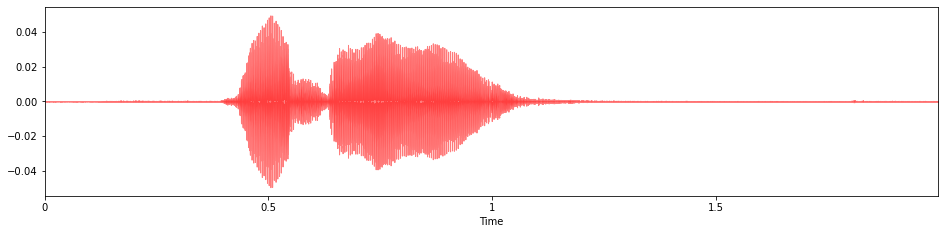

In [32]:
########### Play & Plot
from pydub import AudioSegment
from pydub.playback import play
import librosa
import librosa.display
from matplotlib import pyplot as plt

play(AudioSegment.from_wav(filename))
data1,sr1=librosa.load(filename)
plt.figure(figsize=(16,16))
plt.subplot(4, 1, 1)
librosa.display.waveplot(data1,sr1,color='r',alpha=0.5)


In [39]:
######################################## RECORDED AUDIO DATA1 , SR1 ###################################
# n_fft = 4410
# hop_length = 512
file = 'db\\Hassan.wav'
# file = filename
data1,sr1=librosa.load(file)
n_fft = int(0.025*sr1)      # 25 ms
hop_length = int(0.01*sr1)  # 10 ms
mfcc1 = librosa.feature.mfcc(y=data1, sr=sr1, n_mfcc=13, norm="ortho",hop_length=hop_length, n_fft=n_fft)
x_seq = mfcc1.T # .T means transpose
print(file,n_fft,hop_length)

db\Hassan.wav 551 220


In [40]:
import librosa.sequence
import numpy as np
import os
from heapq import nsmallest
audio_files=[]
directory = r'db'   
for audio in os.listdir(directory): 
    path = os.path.join(directory, audio)
    #if path != file:
    audio_files.append(path)
dict={}
for ref_file in audio_files:
    data2 ,sr2= librosa.load(ref_file)
    n_fft = int(0.025*sr2)      # 25 ms
    hop_length = int(0.01*sr2)  # 10 ms
    mfcc2 = librosa.feature.mfcc(y=data2, sr=sr2, n_mfcc=13, norm="ortho",hop_length=hop_length, n_fft=n_fft)
    y_seq = mfcc2.T
    D, wp = librosa.sequence.dtw(X=mfcc1, Y=mfcc2, metric='cosine')
    N = y_seq.shape[0]
    M = x_seq.shape[0]
    dict[ref_file]=D[-1, -1]/(M + N)
print('The whole distances',dict)
print('The most similar file ',min(dict, key=dict.get))
print('The first 5 similar ',nsmallest(5, dict, key = dict.get))



The whole distances {'db\\Ahmed.wav': 0.02075084463419672, 'db\\Ahmed1.wav': 0.02092129332607944, 'db\\Ahmed2.wav': 0.012833318832494773, 'db\\ahmed4.wav': 0.030624311883736755, 'db\\aisha4.wav': 0.03771578164878063, 'db\\Amira.wav': 0.02268775751990964, 'db\\Amira1.wav': 0.021893925495821212, 'db\\Amira2.wav': 0.02034636577839392, 'db\\amira4.wav': 0.03142545016362771, 'db\\aya4.wav': 0.034282624203841476, 'db\\Dalia.wav': 0.02467996343569178, 'db\\Dalia1.wav': 0.023479291539500194, 'db\\Dalia2.wav': 0.01728387803174416, 'db\\dalia4.wav': 0.03344106050459606, 'db\\ebrahim4.wav': 0.025965697574794548, 'db\\essa4.wav': 0.04392160356558037, 'db\\gehad4.wav': 0.038111638184820426, 'db\\Hasan2.wav': 0.012092365096862371, 'db\\Hassan.wav': 2.4802854805455624e-17, 'db\\Hassan1.wav': 0.015348614599167051, 'db\\hesham4.wav': 0.03831491056679579, 'db\\khalid4.wav': 0.031068647423848027, 'db\\Maram.wav': 0.021656135618817192, 'db\\Maryem.wav': 0.020533835765004307, 'db\\Maryem2.wav': 0.020438873

1.2092365096862372%
db\Hassan.wav  vs  db\Hasan2.wav


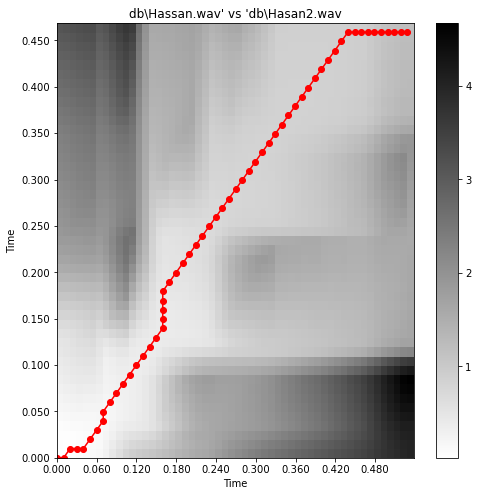

In [41]:
# n_fft = 4410
# hop_size = 512
# sim2=min(dict, key=dict.get)
sim2=nsmallest(2, dict, key = dict.get)[1]
print(dict[sim2])
sim_data ,sim_fs= librosa.load(sim2)
n_fft = int(0.025*sim_fs)      # 25 ms
hop_length = int(0.01*sim_fs)  # 10 ms
sim_mfcc = librosa.feature.mfcc(y=sim_data, sr=sim_fs, n_mfcc=13, norm="ortho",hop_length=hop_length, n_fft=n_fft)
D, wp = librosa.sequence.dtw(X=mfcc1, Y=sim_mfcc, metric='cosine')
wp_s = np.asarray(wp) * hop_length / sr1
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',cmap='gray_r', hop_length=hop_length)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
plt.title(f"{file}' vs '{sim2}")
plt.colorbar()



In [43]:
# # n_fft = 4410
# # hop_length = 512
# # n_fft = int(0.025*sim_fs)      # 25 ms
# # hop_length = int(0.01*sim_fs)  # 10 ms
# mfcc1 = librosa.feature.mfcc(y=data1, sr=sr1, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)
# mfcc2 = librosa.feature.mfcc(y=sim_data, sr=sim_fs, n_mfcc=13, norm="ortho",hop_length=hop_size, n_fft=n_fft)
# import librosa.sequence
# import numpy as np
# D, wp = librosa.sequence.dtw(X=mfcc1, Y=mfcc2, metric='cosine')
# wp_s = np.asarray(wp) * hop_length / sr1
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)
# librosa.display.specshow(D, x_axis='time', y_axis='time',cmap='gray_r', hop_length=hop_length)
# imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),origin='lower', interpolation='nearest', aspect='auto')
# ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
# plt.title(f"{file}' vs '{sim2}")
# plt.colorbar()

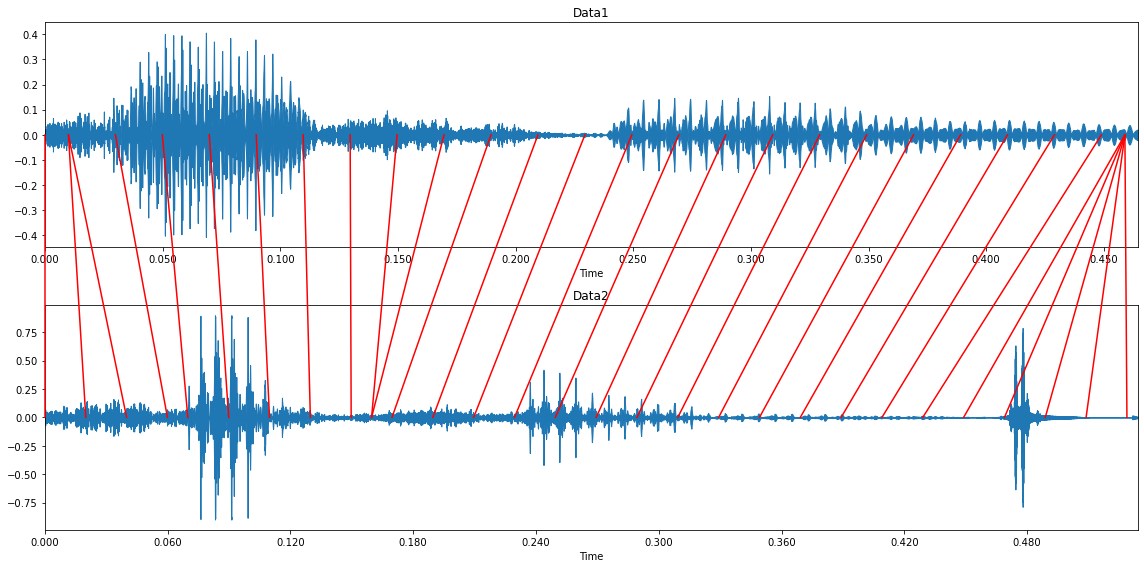

In [42]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(data1, sr=sr1)
plt.title('Data1')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(sim_data, sr=sim_fs)
plt.title('Data2')
ax2 = plt.gca()

plt.tight_layout()
trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
#Returns num evenly spaced samples, calculated over the interval [start, stop].
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_length / sr1:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))
    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='red')
    lines.append(line)

fig.lines = lines
plt.tight_layout()

In [90]:
# import librosa.sequence
# import numpy as np
# from dtw import dtw
# from numpy.linalg import norm
# from heapq import nsmallest
# dict2={}
# for ref_file in audio_files:
#     data2, sr2 = librosa.load(ref_file)
#     mfcc2 = librosa.feature.mfcc(y=data2, sr=sr2, n_mfcc=13, norm="ortho",hop_length=hop_length, n_fft=n_fft)
#     y_seq = mfcc2.T
#     dist, cost, acc_cost, path = dtw(x_seq, y_seq, dist=lambda x, y: norm(x - y, ord=1))
#     dict2[ref_file]=dist
# print('The whole distances',dict2)
# print('The most similar file ',min(dict2, key=dict2.get))
# print('The first 5 similar ',nsmallest(5, dict2, key = dict2.get))


The whole distances {'db\\Ahmed.wav': 52063.49887084961, 'db\\Ahmed1.wav': 93034.14879226685, 'db\\Ahmed2.wav': 79608.4183807373, 'db\\Amira.wav': 59768.56524658203, 'db\\Amira1.wav': 99287.5632019043, 'db\\Amira2.wav': 78081.5726928711, 'db\\Dalia.wav': 56416.945068359375, 'db\\Dalia1.wav': 99446.73278045654, 'db\\Dalia2.wav': 85419.39041137695, 'db\\Hasan2.wav': 86202.5308227539, 'db\\Hassan.wav': 53673.66304016113, 'db\\Hassan1.wav': 98323.7571220398, 'db\\Maram.wav': 54168.44747924805, 'db\\Maryem.wav': 55569.097732543945, 'db\\Maryem2.wav': 78673.22061157227, 'db\\Mayar.wav': 55615.59620666504, 'db\\Mayar2.wav': 87157.52598571777, 'db\\Mostafa.wav': 42858.56895446777, 'db\\Mostafa2.wav': 73905.16874694824, 'db\\Mostafa3.wav': 56958.50678443909, 'db\\Radwa.wav': 52834.87634277344, 'db\\Radwa1.wav': 97110.69691467285, 'db\\Radwa2.wav': 63744.94187450409, 'db\\Radwa3.wav': 60190.738830566406, 'db\\Raouf.wav': 57605.83694458008, 'db\\Raouf2.wav': 79496.17112731934, 'db\\Salah.wav': 62

The normalized distance between the two :  34763.991844177246


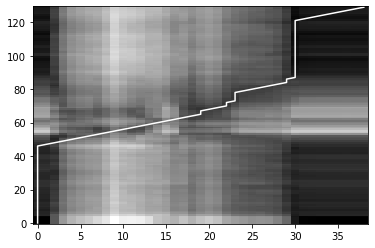

In [48]:
# import librosa
# import matplotlib.pyplot as plt
# from dtw import dtw
# from numpy.linalg import norm
# #Loading audio files
# y1, sr1 = librosa.load('db\\Hassan.wav') 
# y2, sr2 = librosa.load('db\\Hassan1.wav') 

# #Showing multiple plots using subplot
# #plt.subplot(1, 2, 1) 
# mfcc1 = librosa.feature.mfcc(y1,sr1)   #Computing MFCC values
# #librosa.display.specshow(mfcc1)

# #plt.subplot(1, 2, 2)
# mfcc2 = librosa.feature.mfcc(y2, sr2)
# #librosa.display.specshow(mfcc2)

# dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
# #dist, cost, path = dtw(mfcc1.T, mfcc2.T)
# print("The normalized distance between the two : ",dist)   # 0 for similar audios 

# plt.imshow(cost.T, origin='lower', cmap=plt.get_cmap('gray'), interpolation='nearest',aspect='auto')
# plt.plot(path[0], path[1], 'w')
# #plt.xlim((-0.5, cost.shape[0]-0.5))
# #plt.ylim((-0.5, cost.shape[1]-0.5))
# # plt.imshow(cost.T, origin='lower', cmap=plt.get_cmap('gray'), interpolation='nearest')
# # plt.plot(path[0], path[1], 'w')   #creating plot for DTW

# # plt.show()  #To display the plots graphically